# Argentina stats on novel COVID-19 pandemic #

#### The following notebook is based on https://worldometers.info data and https://github.com/CSSEGISandData data. COVID-19 is currently a global pandemic affecting 204 countries and territories around the world. 
#### The objective of this notebook is to provide updated information on Argentina's COVID-19 cases comparing it to other countries of the region and the world, and provide some statistical analysis on them.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import pykalman

confirmed_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recovered_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
death_cases     = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

In [3]:
#arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']) == "Argentina"]
arg_recovered_cases = pd.read_csv("argentina_covid_19_data/argentina-Recovered.csv", encoding = "ISO-8859-1")
arg_death_cases     = pd.read_csv("argentina_covid_19_data/argentina-Deaths.csv", encoding = "ISO-8859-1")
arg_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3290935,3307285,3335965,3371508,3411160,3447044,3482512,3514683,3539484,3562135


In [4]:
#arg_confirmed = arg_confirmed_cases.loc[(arg_confirmed_cases['Country/Region'] == 'Argentina') 
#                & (arg_confirmed_cases['Province/State'] == 'All')]

arg_confirmed = arg_confirmed_cases
#arg_confirmed = arg_confirmed.drop(['Province/State'], axis=1)
arg_confirmed = arg_confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)
arg_confirmed = arg_confirmed.set_index('Country/Region')

# argentina_total = 0
# total_list = []
# for index, rows in arg_confirmed.iterrows():
#     for date, cases in rows.items():
#         argentina_total += cases
#         total_list.append({date: argentina_total})

# tot_cases = np.diag(pd.DataFrame(total_list))
# arg_confirmed_ts = arg_confirmed.copy()

# i = 0
# for index, rows in arg_confirmed_ts.iterrows():
#     print(index)
#     print(rows)
#     for date, cases in rows.items():
#         arg_confirmed_ts.at[index, date] = tot_cases[i]
#         i += 1

arg_confirmed_ts = arg_confirmed
tot_days = np.size(arg_confirmed_ts, axis = 1)
# arg_confirmed_ts

arg_confirmed_cp = arg_confirmed.copy()
confirmed_list = []
for index, rows in arg_confirmed.iterrows():
    last_confirmed = 0
    for date, confirmed in rows.items():
        if last_confirmed > 0:
            arg_confirmed_cp[date] = confirmed - last_confirmed
        
        last_confirmed = confirmed


arg_confirmed = arg_confirmed_cp

## Argentina and other countries in the region

We will now compare Argentina and all latin-american countries in the region, to see the progress that the virus has made on the region

/home/santi/Documents/proyectos/argentina-covid-19/stats/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


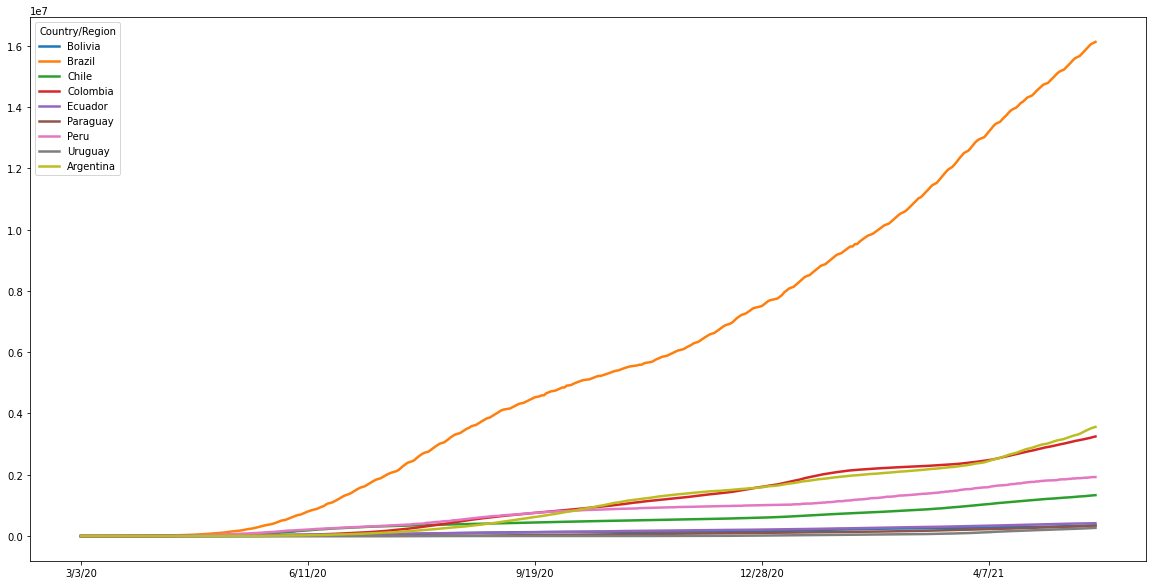

In [5]:
latam_countries = ['Brazil', 'Chile', 'Uruguay', 'Bolivia', 'Paraguay', 'Ecuador', 'Peru', 'Venezeula', 'Colombia']
latam_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(latam_countries)]

latam_confirmed_cases = latam_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis=1)
latam_confirmed_cases = latam_confirmed_cases.set_index('Country/Region')
latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_confirmed_cases = latam_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
latam_confirmed_cases = latam_confirmed_cases[41:]
latam_confirmed_cases.plot(figsize=(20,10), linewidth=2.5);

#### Total confirmed cases over 1M population

/home/santi/Documents/proyectos/argentina-covid-19/stats/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


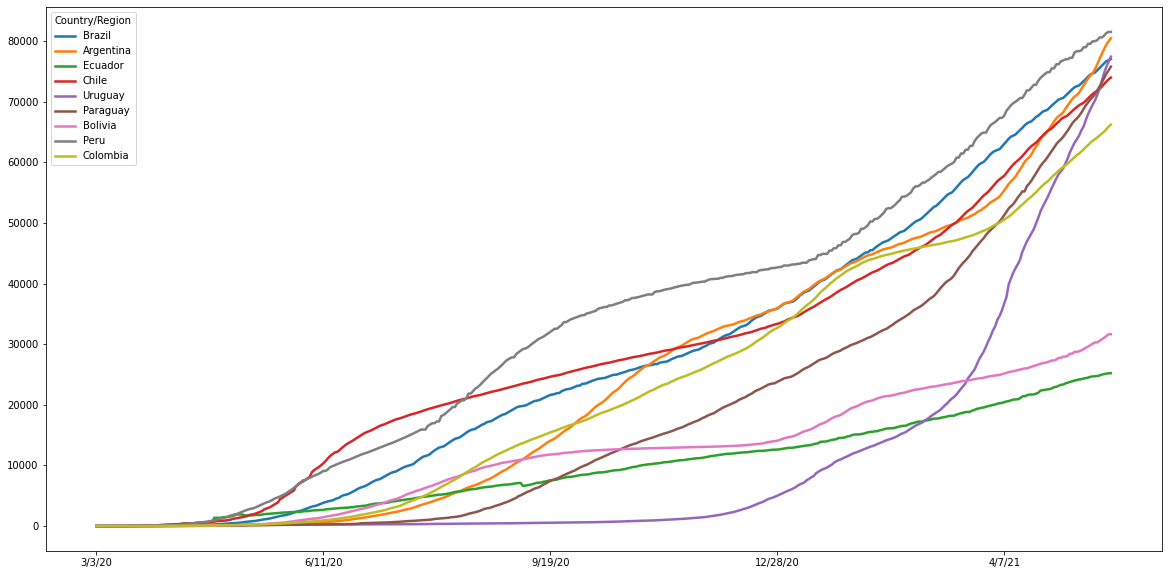

In [6]:
total_populations = {
    'Brazil': 209.3,
    'Argentina': 44.27,
    'Ecuador': 16.62,
    'Chile': 18.05,
    'Uruguay': 3.46,
    'Paraguay': 4.43,
    'Bolivia': 11.05,
    'Peru': 23.62,
    'Venezeula': 31.98,
    'Colombia': 49.07
}

latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations.items():
    country_cases = latam_confirmed_cases.loc[latam_confirmed_cases.index == country]
    latam_conf_cases_by_pop = latam_conf_cases_by_pop.append(country_cases.div(pop))
    
latam_conf_cases_by_pop.transpose().plot(figsize=(20,10), linewidth=2.5);

## Argentina and european countries

/home/santi/Documents/proyectos/argentina-covid-19/stats/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


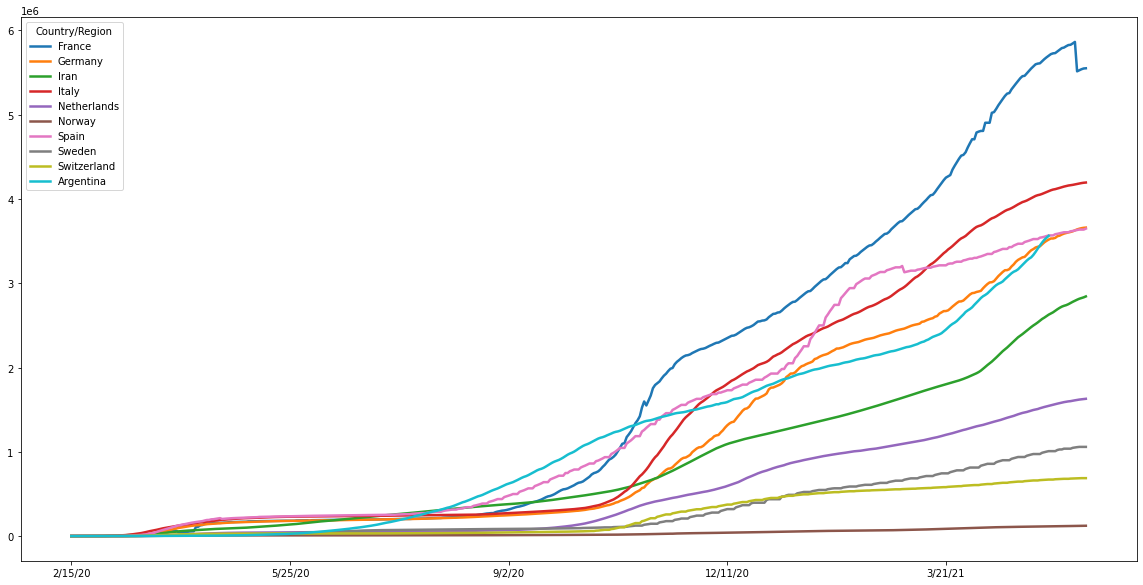

In [7]:
euro_countries = ['Italy', 'Iran', 'Spain', 'Germany', 'France', 'Switzerland', 'UK', 'Netherlands', 'Norway', 'Sweden']
euro_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(euro_countries)]
euro_confirmed_cases = euro_confirmed_cases.loc[(euro_confirmed_cases['Province/State']).isna()]
euro_confirmed_cases = euro_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis = 1)
euro_confirmed_cases = euro_confirmed_cases.set_index('Country/Region')
euro_confirmed_cases = euro_confirmed_cases.transpose()

euro_confirmed_cases = euro_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
euro_confirmed_cases = euro_confirmed_cases[24:]
euro_confirmed_cases['Argentina'] = euro_confirmed_cases['Argentina'].shift(-17)
euro_confirmed_cases = euro_confirmed_cases[:tot_days]
euro_confirmed_cases.plot(figsize=(20,10), linewidth=2.5);

#### Total confirmed cases over 1M population

/home/santi/Documents/proyectos/argentina-covid-19/stats/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


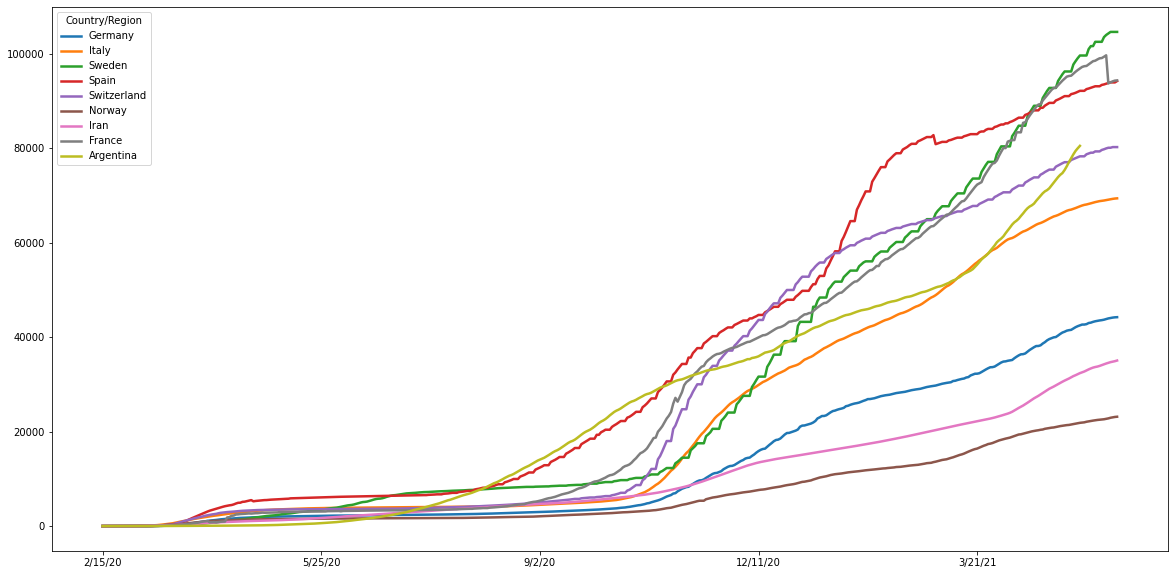

In [8]:
total_populations_eu = {
    'Germany': 82.79,
    'Italy': 60.48,
    'Sweden': 10.12,
    'Spain': 38.73,
    'Switzerland': 8.57,
    'Norway': 5.3,
    'Iran': 81.16,
    'France': 58.85,
    'Argentina': 44.27,
}

euro_confirmed_cases = euro_confirmed_cases.transpose()
euro_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations_eu.items():
    country_cases = euro_confirmed_cases.loc[euro_confirmed_cases.index == country]
    euro_conf_cases_by_pop = euro_conf_cases_by_pop.append(country_cases.div(pop))
    
euro_conf_cases_by_pop.transpose().plot(figsize=(20,10), linewidth=2.5);

## Predicting future outcomes with current data

### Incubation Period

Current data indicates that the mean incubation period is 8.62 (95% CI : 8.02-9.28 days), and that the distribution function that best fits the data is:

$$ g(v) = \alpha \lambda \frac{exp(-(v\lambda)^\alpha)}{\Gamma(1/\alpha)} $$

The best estimators found (via likelihood) were:

$ \hat{\alpha} = 2.04 $

$ \hat{\lambda} = 0.103 $

For references check: https://www.researchgate.net/publication/339846092_Estimation_of_incubation_period_distribution_of_COVID-19_using_disease_onset_forward_time_a_novel_cross-sectional_and_forward_follow-up_study

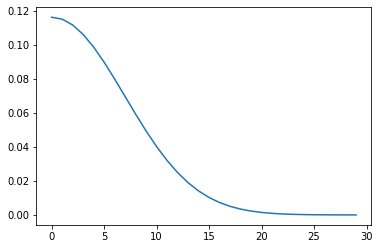

In [9]:
import math

alpha_hat = 2.04
lambda_hat = 0.103

def g(v):
    a = -math.pow(v*lambda_hat, alpha_hat)
    b = math.gamma(1 / alpha_hat)
    return alpha_hat * lambda_hat * (math.exp(a)/ b)


X = np.arange(0, 30)
plt.plot(X, [g(x) for x in X]);

In [10]:
# accept-reject method
def g_rvs(N):
    samples = []
    while(len(samples) < N):
        u1 = np.random.uniform()
        u2 = np.random.uniform(0, 25)

        g_val = g(u2)
        if(u1 <= g_val):
            samples.append(u2)
            
    return samples

n = 50000
samples = g_rvs(n)

mean: 5.445449448000015
min: 0.00039592299828916655
max: 24.927586562071806
median: 4.632419727578537
sd: 4.068379994842857


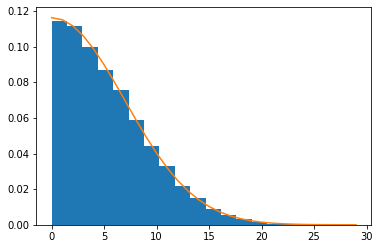

In [11]:
plt.hist(samples, density = True, bins = 'sturges')
plt.plot(X, [g(x) for x in X]);

print("mean: " + str(np.mean(samples)))
print("min: " + str(np.min(samples)))
print("max: " + str(np.max(samples)))
print("median: " + str(np.median(samples)))
print("sd: " + str(np.std(samples)))

## Analyzing the pandemic in Argentina

### Daily new cases histogram in Argentina

We now present a histogram of the daily cases in Argentina. We must then analyze this data to predict future outcomes based on the incubation period described before.

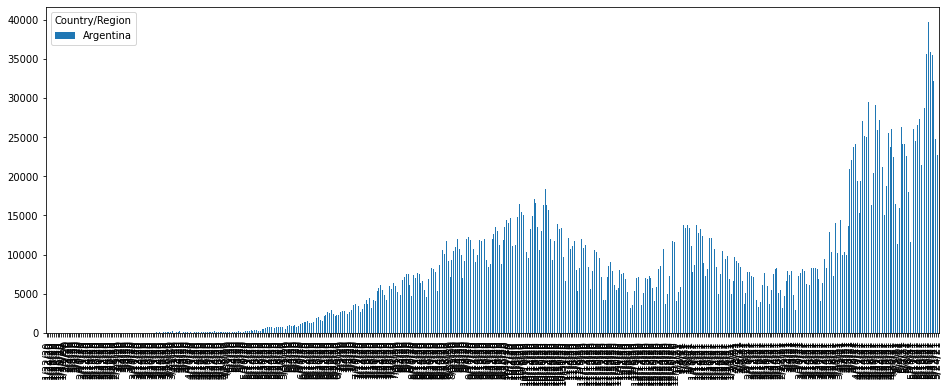

In [12]:
arg_confirmed.transpose().plot(kind="bar", figsize=(16,6));

### Effective reproduction number ($R_e$)

#### Introduction

We are going to present 3 cases:
- $ R_e < 1 $
- $ R_e = 1 $
- $ R_e > 1 $

The first case should present a slow decrease of the disease

The second case represents a constant increase in a linear fashion

The third case represents an exponential increase of the disease

#### Decreasing disease: $R_e < 1$

We are going to present 3 models with a rate of transmission that is less than 1, these will be:
- $ \rho = 0.2 $
- $ \rho = 0.5 $
- $ \rho = 0.8 $

Notice that if we start with a value of $ \rho < 1 $ and some value of initial cases we will fail to address how the disease changes, since we are not simulating the recovery distribution for the infected cases, this means that the values will decrease drastically becauase we do not take into account all of the possible infections that previous infected cases could have done.

Therefore, we must use a function as our $ \rho $, that is $ \rho = f(d) $ where $d$ represent the current day of our simulation.

We wish then to have a function that decays rapidly and stays constant in $0.2$ indefinitely with a previous surge whcih will simulate the virus spreading. Thus we can have a more accurate description of what a value of $\rho < 1$ does. For this we will use a decaying exponential taht converges to our desired value for every case.

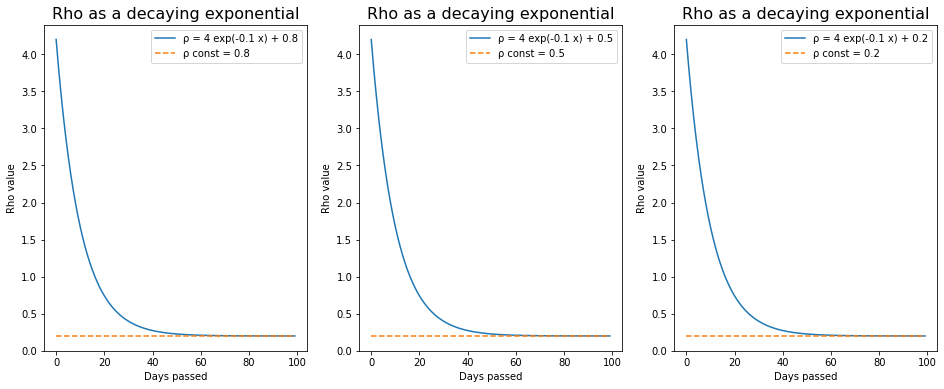

In [13]:
def rho(const, x):
    # Decaying exponential that converges to const
    return 4 * math.exp(-0.1 * x) + const

x = np.arange(0, 100)
rho_list = [0.8, 0.5, 0.2]

fig, axs = plt.subplots(1,3, figsize=(16, 6))
for i in range(len(rho_list)):
    cur_rho = rho_list[i]
    cur_ax = axs[i]
    cur_ax.set_title('Rho as a decaying exponential', size=16)
    cur_ax.set_xlabel('Days passed')
    cur_ax.set_ylabel('Rho value')
    cur_ax.plot(x, [rho(0.2, x_val) for x_val in x], label = 'ρ = 4 exp(-0.1 x) + ' + str(cur_rho))
    cur_ax.plot(x, [0.2 for _ in x], linestyle='--', label = 'ρ const = ' + str(cur_rho))
    cur_ax.legend();

In [14]:
def addOrSum(dictionary, key, value):
    if key in dictionary:
        dictionary[key] += value
    else:
        dictionary[key] = value
        
def predict(rho_const, init_cases, min_length, N, allowComments = False, forceStop = True, multiplier = 1):
    predicted_total_cases = {}
    for _ in range(N):
        predicted_cases = {0: init_cases}
        for i in range(min_length):
            if allowComments:
                print("Iteration: " + str(i) + ", Current rho: " + str(rho(rho_const, i)))
                print("##############")

            if i in predicted_cases:
                infected_cases = predicted_cases[i]
            else:
                continue

            samples = g_rvs(infected_cases)
            for sample in samples:
                infection_day = math.ceil(sample + i)
                prediction = rho(rho_const, i)
                addOrSum(predicted_cases, infection_day, prediction)
        sorted_cases = dict(sorted(predicted_cases.items()))
        sorted_cases = {k: math.ceil(v) for k, v in sorted_cases.items()}
        for day, infected in sorted_cases.items():
            addOrSum(predicted_total_cases, day, infected)
    
    mean_sorted_cases = {k: multiplier * v/N for k, v in predicted_total_cases.items()}
    
    if forceStop:
        keys = mean_sorted_cases.keys()
        keys = list(filter(lambda x: x < min_length, keys))
        return {k: mean_sorted_cases[k] for k in keys}
    else:
        return mean_sorted_cases
            
        
                            
arg_confirmed_dict = arg_confirmed.to_dict()
arg_confirmed_dict = {k: v['Argentina'] for k, v in arg_confirmed_dict.items()}

In [15]:
rho_list = [0.8, 0.5, 0.2]
predictions = []
for i in range(len(rho_list)):
    cur_rho = rho_list[i]
    N = 10
    predictions.append(predict(cur_rho, 1, len(arg_confirmed_dict), N, multiplier = 500))

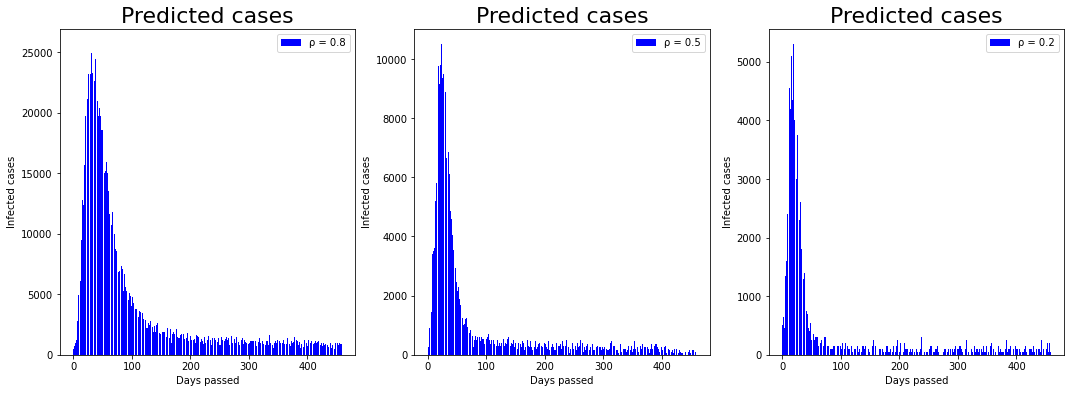

In [16]:
fig, axs = plt.subplots(1,3, figsize=(18, 6))

for i in range(len(rho_list)):
    cur_rho = rho_list[i]
    cur_ax = axs[i]
    cur_ax.set_title('Predicted cases', size=22)
    cur_ax.set_xlabel('Days passed')
    cur_ax.set_ylabel('Infected cases')
    cur_ax.bar(list(predictions[i].keys()), predictions[i].values(), color='b', label = 'ρ = ' + str(cur_rho))
    cur_ax.legend();
    
#axs[0].bar(list(arg_confirmed_dict.keys()), arg_confirmed_dict.values(), color = 'r')

#### Linear increase ($R_e = 1$)

In [17]:
N = 10
rho_const = 1
prediction = predict(rho_const, 1, len(arg_confirmed_dict), N, multiplier = 500)

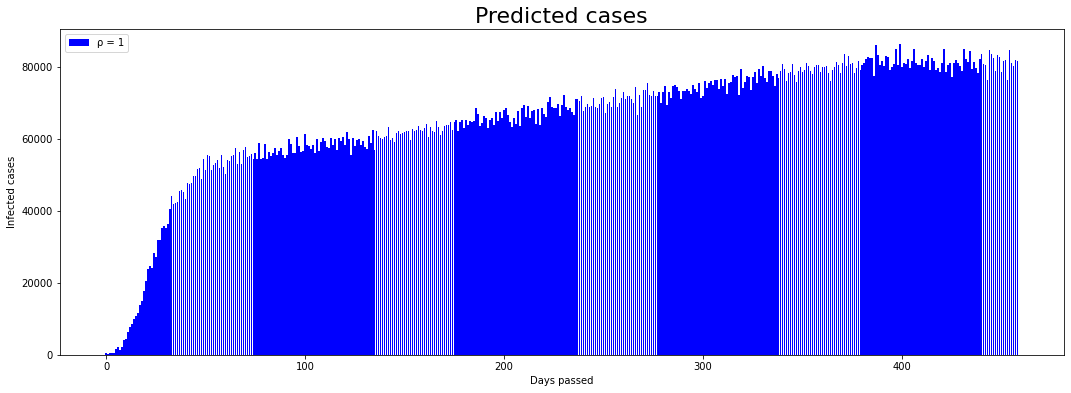

In [18]:
fig, ax = plt.subplots(1,1, figsize=(18, 6))
ax.set_title('Predicted cases', size=22)
ax.set_xlabel('Days passed')
ax.set_ylabel('Infected cases')
ax.bar(list(prediction.keys()), prediction.values(), color='b', label = 'ρ = ' + str(rho_const))
ax.legend();

#### Exponential increase ($R_e > 1$)

In [19]:
rho_list = [1.2, 1.5, 2]
predictions = []
for i in range(len(rho_list)):
    cur_rho = rho_list[i]
    N = 10
    predictions.append(predict(cur_rho, 1, 50, N))

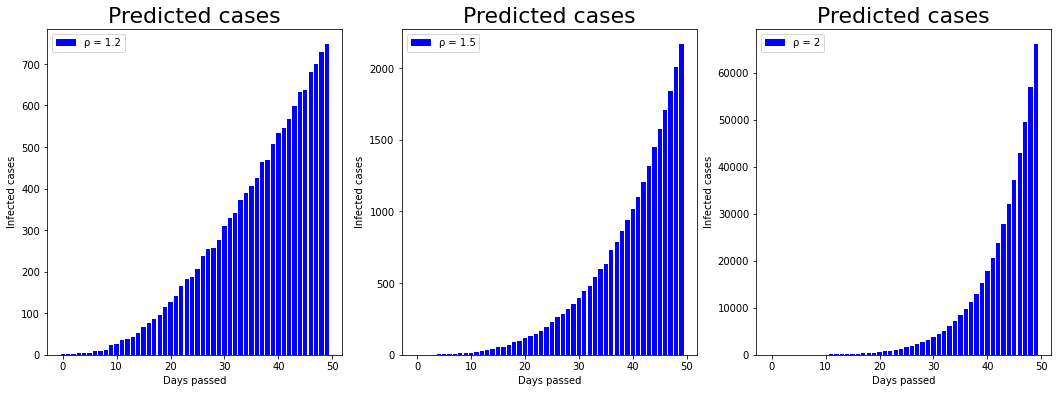

In [20]:
fig, axs = plt.subplots(1,3, figsize=(18, 6))

for i in range(len(rho_list)):
    cur_rho = rho_list[i]
    cur_ax = axs[i]
    cur_ax.set_title('Predicted cases', size=22)
    cur_ax.set_xlabel('Days passed')
    cur_ax.set_ylabel('Infected cases')
    cur_ax.bar(list(predictions[i].keys()), predictions[i].values(), color='b', label = 'ρ = ' + str(cur_rho))
    cur_ax.legend();
    
#axs[0].bar(list(arg_confirmed_dict.keys()), arg_confirmed_dict.values(), color = 'r')

In [21]:
# TODO: Use csv instead of predicting again
#with open('exp_predictions.csv', 'r+') as f:
#    for prediction in predictions:
#        f.write('####\n')
#        for k, v in prediction.items():
#            f.write(str(k) + ", " + str(v) + '\n')
#        f.write('####\n')

### Analyzing $R_e$ in Argentina

#### Introduction

The effective reproduction number $R_e$ is defined as the average number of secondary cases that are produced by a primary case. This number varies over time because of a lot of factors (social behaviour, climate, variance of susceptible individuals, etc).

On the other hand the basic reproduction numer $R_0$ measures the average number of secondary cases produced by a primary case for a population that is fully susceptible.

Thus, the effective reproduction number is the one we wish to estimate (because in a given population the amount of susceptible individuals change over time) whilst the basic reproduction number is very important to know how contagious the disease is.

#### Estimating $R_e$

To estimate $R_e$ we will follow the approach that was followed in the paper cited below.
This paper uses the SIR model to estimate the effective reproduction number $R_t$.

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0244474

#### SIR Model

The standard SIR model in discrete time describes the evolution of susceptible ($S_t$), infected ($I_t$), and recovered ($R_t$) individuals by the following equations:

$ S_t = S_{t-1} - \beta_t I_{t-1} \frac{S_{t-1}}{N} $

$ I_t = I_{t-1} + \beta_t I_{t-1} \frac{S_{t-1}}{N} - \gamma I_{t-1} $

$ R_t = R_{t-1} + \gamma I_{t-1} $

If we define $gr(I_t) = \frac{I_t - I_{t-1}}{I_{t-1}}$ then it can be showed that:

$ gr(I_t) = R_0^{(t)} \frac{S_{t-1}}{N} - 1 = \gamma(R_t - 1) $

Hence we can get an estimator for the effective reproduction rate:

$ \hat{R_t} = 1 + \frac{1}{\gamma} \hat{gr(I_t)} $

Therefore, we need to:
1. Estimate $gr(I_t)$
2. Obtain $\gamma$ 

Where $gr(I_t)$ is defined as the growth rate of $I_t$ and $\gamma$ is the daily transition rate from infected to recovered

#### Estimating $gr(I_t)$

To start with this estimation, we should first get a vector of observations of $gr(I_t)$ based on the observation of new cases and computation of $gr(I_t)$ for each $t$.

From the SIR model depicted above, we can see that:

$ I_t = (1 - \gamma)I_{t-1} + cases_t $

One we calculate every $I_t$ we construct a series consisting of ${{gr(I_0), gr(I_1), ..., gr(I_n)}}$ which will be our observations.

We then specify a state-space model:

Observation equation: $ gr(I_t) = \gamma (R_t - 1) + \epsilon_t $

State equation: $ R_t = R_{t-1} + \nu_t $

Where $\epsilon_t \sim N(0, \sigma_{\epsilon}^2)$ and $\nu_t \sim N(0, \sigma_{\nu}^2) $

In [13]:
cases = arg_confirmed.to_numpy()[0]
init_zeros = 44
N = len(cases) - init_zeros
grI = np.zeros((1, N-1))
I = np.zeros((1, N))
gamma = 1/7

I[0, 0] = 1
for i in range(1, N):
    I[0,i] = (1 - gamma)*I[0,i-1] + cases[i + init_zeros]
    
for i in range(N- 1):
    I_fut = I[0, i+1]
    I_cur = I[0, i]
    grI[0, i] = (I_fut - I_cur) / I_cur


#### Applying the Kalman Smoother to obtain $R_e$

In [14]:
from pykalman import KalmanFilter

# TODO: Estimate this unknown variables
init_mean = 1
init_cov = 1
transition_cov = 0.1
observation_cov = 0.15

kf = KalmanFilter(
    initial_state_mean = init_mean,
    initial_state_covariance = init_cov,
    transition_matrices = 1,
    transition_offsets = 0,
    transition_covariance = transition_cov,
    observation_matrices = gamma,
    observation_offsets = -gamma,
    observation_covariance = observation_cov
)    

kf = kf.em(grI, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.smooth(grI)
filtered_state_se = np.sqrt(filtered_state_covariances)

y = np.array(filtered_state_means)
err = np.array(filtered_state_se)

In [15]:
def convert_err(err_array):
    new_array = np.zeros((1, len(err_array)))
    for i in range(len(err_array)):
        new_array[0, i] = err_array[i]

    return new_array

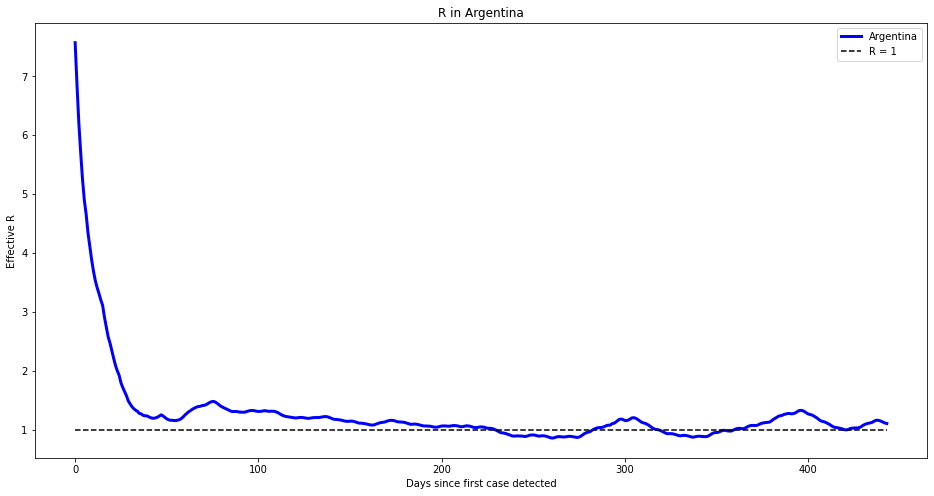

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
x_vals = [x for x in range(len(y))]
ax.plot(x_vals, y, color = 'b', linewidth = 3, label = 'Argentina')
ax.plot(x_vals, [1 for _ in range(len(y))], linestyle='--', color = 'k', label = 'R = 1')
#np_err = np.array(convert_err(err))
#ax.fill_between(x_vals, y - np_err.T, y + np_err.T)
ax.legend()
ax.set_xlabel('Days since first case detected')
ax.set_ylabel('Effective R')
ax.set_title('R in Argentina');

### Predicting outcome via daily new cases data

Instead of trying to calculate the apparent transmission rate, we will now consider the daily new cases data and find a logistic model that fits it.

#### Logistic model

The logistic model is frequently used to model the growth of populations. It seems reasonable then to assume that the current pandemic, which grows as a pathogen in the population, can be modeled by it.

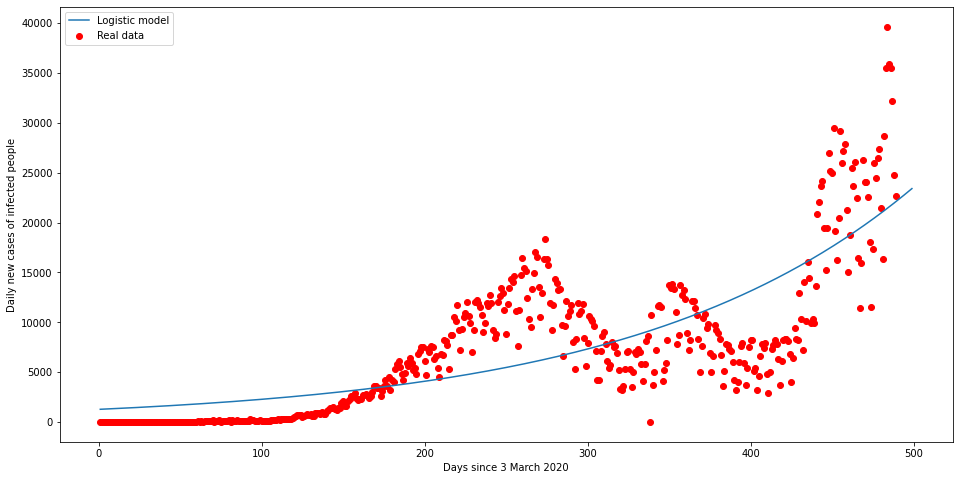

In [17]:
from scipy.optimize import curve_fit

def get_clean_dict(arg_dataframe):
    dict_arg_confirmed = arg_dataframe.to_dict()
    temp = {}
    for date, cases in dict_arg_confirmed.items():
        for _, num_cases in cases.items():
            temp[date] = num_cases
    return temp

def logistic_model(x, a, b, c):
    return c/(1 + np.exp( -(x-b) / a))

def line(x,m,n):
    return x*m+n

dict_arg_confirmed = get_clean_dict(arg_confirmed)
days_data = {}
day = 1
for date, cases in dict_arg_confirmed.items():
    days_data[day] = cases
    day += 1

days_data_df = pd.DataFrame([days_data], columns=days_data.keys())
x = list(days_data.keys())
y = list(days_data.values())

fut_x = [i for i in range(x[-1] + 1, x[-1] + 11)]
pred_x = x + fut_x

logistic_fit = curve_fit(logistic_model, x, y, maxfev = 10000)
errors = [np.sqrt(logistic_fit[1][i][i]) for i in [0,1,2]]

fig, ax = plt.subplots(figsize = (16, 8))
# Real data
ax.scatter(x, y, label="Real data", color="red")

# Predicted exponential curve
ax.plot(pred_x, [logistic_model(i, logistic_fit[0][0], logistic_fit[0][1], logistic_fit[0][2]) for i in pred_x], label="Logistic model")

ax.legend()
ax.set_xlabel("Days since 3 March 2020")
ax.set_ylabel("Daily new cases of infected people");

#### Exponential model

The logistic model is of course more realistic because it stops at some time in the future, the exponential one is unbounded, therefore it is used to see the current growth and the expected number of cases in the near future, since it will always end up looking like a logistic anyways.

/home/santi/Documents/proyectos/argentina-covid-19/stats/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


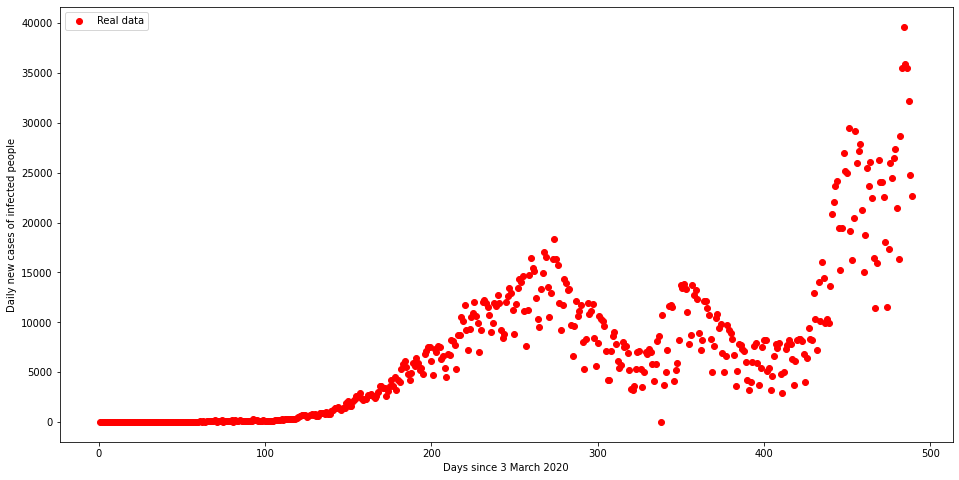

In [18]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

x = list(days_data.keys())
y = list(days_data.values())

fut_x = [i for i in range(x[-1] + 1, x[-1] + 21)]
pred_x = x + fut_x

exp_fit = curve_fit(exponential_model, x, y, maxfev = 10000)

fig, ax = plt.subplots(figsize = (16, 8))
# Real data
ax.scatter(x, y, label="Real data", color="red")

# Predicted exponential curve
# ax.plot(pred_x, [exponential_model(i, exp_fit[0][0], exp_fit[0][1], exp_fit[0][2]) for i in pred_x], label="Exponential model")

ax.legend()
ax.set_xlabel("Days since 3 March 2020")
ax.set_ylabel("Daily new cases of infected people");

#### Linear model

Although virus outbreaks are exponential in nature, society response adds a variability that could then make the spread linear. Also a linear model is generally good to have a notion of the current tendency of the disease in question.

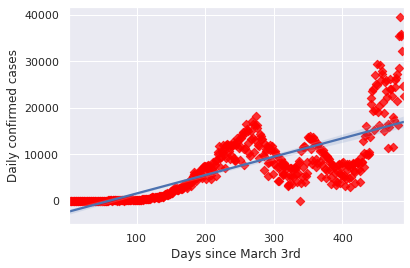

In [19]:
import seaborn as sns

x = list(days_data.keys())
y = list(days_data.values())

x, y = pd.Series(x, name="Days since March 3rd"), pd.Series(y, name="Daily confirmed cases")
sns.set(color_codes = True)
ax = sns.regplot(x = x, y = y, marker = 'D', scatter_kws={"color": "red"})

#### Residual analysis, errors and comparison of models

In [191]:
# todo

## Getting actual infected cases from diagnosed cases


In [ ]:
# todo

## Cases in Argentinian provinces (Outdated)

#### Daily cases time series for Argentina

In [ ]:
arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_confirmed_cases = arg_confirmed_cases.drop(['Country/Region'], axis=1)
arg_confirmed_cases = arg_confirmed_cases.loc[arg_confirmed_cases['Province/State'] != 'All']
arg_confirmed_cases = arg_confirmed_cases.set_index('Province/State')

arg_confirmed_cases_copy = arg_confirmed_cases.copy()
arg_confirmed_ts = arg_confirmed_cases.copy()
total = 0
time_series_list = []
for index, rows in arg_confirmed_cases_copy.iterrows():
    cases_dict = {}
    for date, cases in rows.items():
        total += cases
        arg_confirmed_ts.at[index, date] = total
        
    total = 0

arg_confirmed_ts.transpose().plot(figsize = (20, 10))

In [ ]:
from IPython.display import Markdown

infected_provinces = len(arg_confirmed_cases)
current_date = "30/03/2020"

Markdown("""
Argentina has 23 provinces and one autonomous city (city of Buenos Aires).
As of {current_date} the current provinces with COVID-19 confirmed cases are {infected_provinces}. 
""".format(infected_provinces=infected_provinces, current_date=current_date))

#### Total confirmed cases over 1M population

In [ ]:
total_populations_arg = {
    'Provincia de Buenos Aires': 15.59,
    'Ciudad de Buenos Aires': 2.89,
    'Provincia de Cordoba': 3.30,
    'Provincia de Santa Fe': 3.30,
    'Provincia de Mendoza': 1.74,
    'Provincia de Tucuman': 1.59,
    'Provincia de Entre Rios': 1.24,
    'Provincia de Salta': 1.22,
    'Provincia de Misiones': 1.09,
    'Provincia de Chaco': 1.05,
    'Provincia de Corrientes': 0.99,
    'Provincia de Santiago del Estero': 0.89,
    'Provincia de San Juan': 0.68,
    'Provincia de Jujuy': 0.67,
    'Provincia de Rio Negro': 0.63,
    'Provincia de Neuquen': 0.55,
    'Provincia de Formosa': 0.53,
    'Provincia de Chubut': 0.50,
    'Provincia de San Luis': 0.46,
    'Provincia de Catamarca': 0.37,
    'Provincia de La Rioja': 0.33,
    'Provincia de La Pampa': 0.32,
    'Provincia de Santa Cruz': 0.27,
    'Provincia de Tierra del Fuego': 0.13
}

arg_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations_arg.items():
    country_cases = arg_confirmed_ts.loc[arg_confirmed_ts.index == country]
    arg_conf_cases_by_pop = arg_conf_cases_by_pop.append(country_cases.div(pop))

arg_conf_cases_by_pop.transpose().plot(figsize = (20, 10))

#### Distribution of cases in each province

In [ ]:
#labels = list(total_populations_arg.keys())
#sizes = []
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0, 0.1, 0, 0)
#for province in labels:
#    print(province)
#    print(arg_confirmed_ts.loc[arg_confirmed_cases['Province/State']])
#    prop = arg_confirmed_ts.loc[arg_confirmed_cases['Province/State'] == province]
    
    
#sizes = [40, 20, 20, 20]
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct='%1.1f%%', shadow=True, startangle=90)
#plt.axis('equal')
#plt.title('Year 2013')
#plt.show()

## Applying the SIR model to Argentina


In [ ]:
# todo

## Analyzing communitary transmission

In [ ]:
# todo

## Testing: Amount and positive cases

In [ ]:
# todo

## Log plots

In [ ]:
# todo